<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1> Regression Model Development </h1>
<br><h4> Nivedita Venkatramanan </h4>
Hult International Business School<br>
MBAN_1, 2022, San Francisco <br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>Analytical Objectives of this Script</h3><br><br>
Develop a regression model to predict the birthweight by following the below steps::<br>
1. Analyze the Birthweight dataset by studying the variables. <br>
2. Transform or perform feature engineering on the x-variables as necessary to improve the model performance. <br>
3. Experiment the model and select the best model for use. <br>
4. Create a testing and training set.<br>
5. Use the above data on different model types to check model accuracy. <br>
6. Pick the best model. <br><br><br>

## Part I - Exploring the Dataset <br><br>

In [1]:
# Importing required packages & libraries for analysis and model development
import os                                             ## OS 
import pandas as pd                                   ## data science essentials
import matplotlib.pyplot as plt                       ## essential graphical outputs
import seaborn as sns                                 ## enhanced graphical output
import statsmodels.formula.api as smf                 ## regression modeling
from sklearn.model_selection import train_test_split  ## train/test split
import sklearn.linear_model                           ## Linear Models
import numpy as np                                    ## numpy
from sklearn.linear_model import LinearRegression     ## LinearRegression

<br>

In [2]:
pd.set_option('display.max_rows', 500)              ## setting display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = 'birthweight_low.xlsx'                 ## defining the path to the file 

## reading the file as a dataframe(df)
low_bw = pd.read_excel(io         = file,      
                       sheet_name = 0,
                       header     = 0)
low_bw.head(n = 10)                          ## displaying the head of the df limit to 10 rows

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827
5,26,12.0,1,10.0,24,12.0,8,9,6,8,1,0,0,1,0,0,1,2778
6,26,13.0,7,11.0,42,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
7,26,11.0,1,12.0,44,12.0,9,9,10,4,1,0,1,0,0,1,0,3310
8,26,16.0,2,10.0,24,16.0,9,9,11,4,1,0,1,0,0,1,0,3730
9,26,12.0,1,12.0,32,12.0,9,9,6,0,1,0,1,0,0,1,0,3912


In [3]:
## formatting and printing the dimensions of the dataset

print(f"""
Size of Original Dataset
------------------------

Observations: {low_bw.shape[0]}
Features:     {low_bw.shape[1]}
""")


Size of Original Dataset
------------------------

Observations: 352
Features:     18



In [4]:
## Getting information & data type of each variable

print(f"""
Information & data types of each variable
-----------------------------------------
""")
print(low_bw.info(verbose = True))  


Information & data types of each variable
-----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   349 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   349 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   345 non-null    float64
 6   omaps   352 non-null    int64  
 7   fmaps   352 non-null    int64  
 8   cigs    352 non-null    int64  
 9   drink   352 non-null    int64  
 10  male    352 non-null    int64  
 11  mwhte   352 non-null    int64  
 12  mblck   352 non-null    int64  
 13  moth    352 non-null    int64  
 14  fwhte   352 non-null    int64  
 15  fblck   352 non-null    int64  
 16  foth    352 non-null    int64  
 17  bwght   352 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 49.6 KB
None


## Part II - Analysis of the variables<br>

<h3> Birthweight (y-variable) </h3><br>
Since, we need to predict the birthweight, this becomes the y-variable (also called response / dependent) for our analysis.<br>
To begin with we shall analyze the y-variable, (bwght) (which is continuous) as it is a measure of weight in grams.<br>


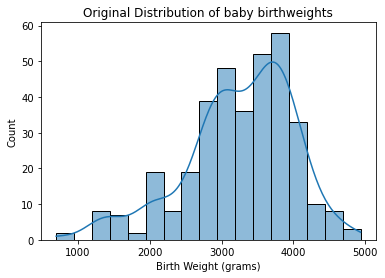

In [5]:
# developing a histogram using HISTPLOT
sns.histplot(data  = low_bw,
              x    = 'bwght',
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of baby birthweights")
plt.xlabel(xlabel = "Birth Weight (grams)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()


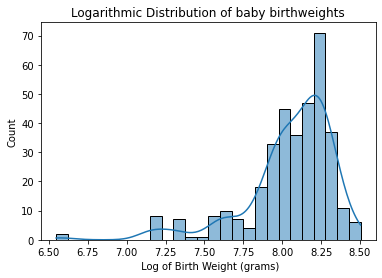

In [6]:
# Creating a log of birthweight data & 
# saving to the dataset
low_bw['log_bwght'] = np.log(low_bw['bwght'])

sns.histplot(data  = low_bw,
              x    = 'log_bwght',
            kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of baby birthweights")
plt.xlabel(xlabel = " Log of Birth Weight (grams)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()



<h3> Other variables in the dataset </h3><br>
Performing a descriptive statistics to identify and classify other variables. <br>

In [7]:
## getting the summary stats of the numeric data (int and float)
low_bw.describe(include = [int, float]).round(decimals = 2)  

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght
count,352.00,349.00,352.00,349.00,352.00,345.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00
mean,38.93,13.54,2.02,13.53,40.60,13.58,7.95,8.88,10.76,5.53,0.55,0.33,0.36,0.30,0.40,0.33,0.27,3246.09,8.05
std,10.36,2.29,0.34,6.32,12.21,2.97,2.02,0.79,6.95,3.87,0.50,0.47,0.48,0.46,0.49,0.47,0.45,757.70,0.29
min,21.00,0.00,1.00,2.00,19.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,6.55
25%,32.00,12.00,2.00,10.00,31.75,12.00,8.00,9.00,5.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2867.75,7.96
50%,37.00,13.00,2.00,12.00,39.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3349.00,8.12
75%,45.00,16.00,2.00,16.00,47.25,16.00,9.00,9.00,16.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3778.75,8.24
max,73.00,18.00,7.00,42.00,72.00,19.00,10.00,10.00,32.00,21.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,8.50


<h4>Plotting other continuous variables to understand their distribution</h4><br>
The original and logarithmic distribution have been plotted side by side to make is visually appealing for easy comparison. 

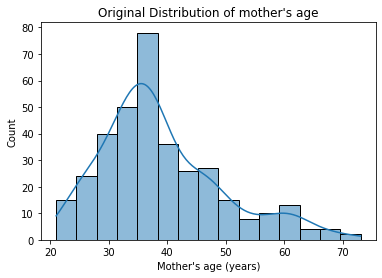

In [8]:
# developing a histogram using HISTPLOT
sns.histplot(data  = low_bw,
              x    = 'mage',
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of mother's age")
plt.xlabel(xlabel = "Mother's age (years)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()



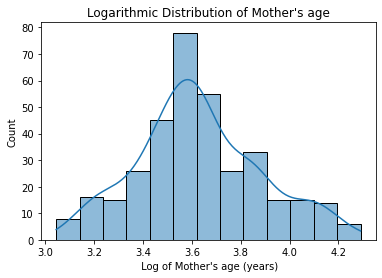

In [9]:
# Creating a log of mage & saving to the dataset
low_bw['log_mage'] = np.log(low_bw['mage'])

sns.histplot(data  = low_bw,
              x    = 'log_mage',
            kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother's age")
plt.xlabel(xlabel = " Log of Mother's age (years)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()



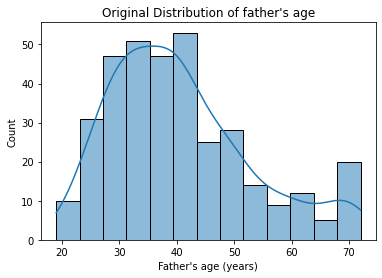

In [10]:
# developing a histogram using HISTPLOT
sns.histplot(data  = low_bw,
              x    = 'fage',
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of father's age")
plt.xlabel(xlabel = "Father's age (years)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()


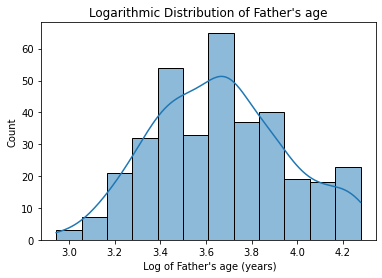

In [11]:
# Creating a log of fage & saving to the dataset
low_bw['log_fage'] = np.log(low_bw['fage'])

sns.histplot(data  = low_bw,
              x    = 'log_fage',
            kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Father's age")
plt.xlabel(xlabel = " Log of Father's age (years)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()



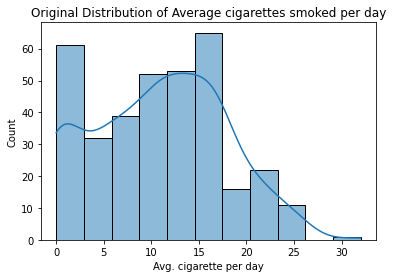

In [12]:
# developing a histogram using HISTPLOT
sns.histplot(data  = low_bw,
              x    = 'cigs',
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Average cigarettes smoked per day")
plt.xlabel(xlabel = "Avg. cigarette per day") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()


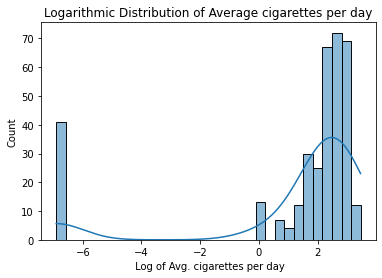

In [13]:
# Creating a log of cigs & saving to the dataset
low_bw['log_cigs'] = np.log(low_bw['cigs'] + 0.001)  ## adding 0.001 to avoid division by zero 

sns.histplot(data  = low_bw,
              x    = 'log_cigs',
            kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Average cigarettes per day")
plt.xlabel(xlabel = " Log of Avg. cigarettes per day") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()



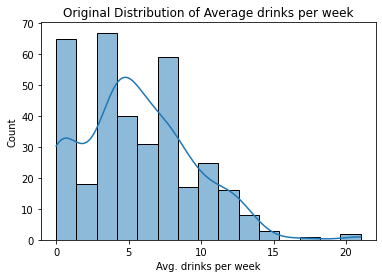

In [14]:
# developing a histogram using HISTPLOT
sns.histplot(data  = low_bw,
              x    = 'drink',
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Average drinks per week")
plt.xlabel(xlabel = "Avg. drinks per week") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()


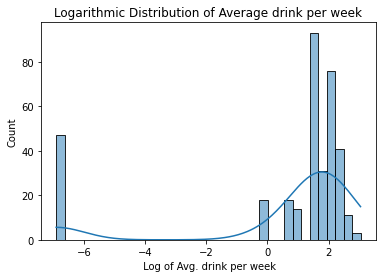

In [15]:
# Creating a log of cigs & saving to the dataset
low_bw['log_drink'] = np.log(low_bw['drink'] + 0.001)  ## adding 0.001 to avoid division by zero 

sns.histplot(data  = low_bw,
              x    = 'log_drink',
            kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Average drink per week")
plt.xlabel(xlabel = " Log of Avg. drink per week") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()



*Analyzing correlation between other continuous variables and bwght*<br>

In [16]:
## Analyzing correlation between other continuous variables and bwght

# creating a list of continuous features (including Y-variable) & male (since it is binary)
continuous_data = ['bwght','mage','fage','cigs','drink','male']


# developing a correlation matrix based on continuous features
bw_corr = low_bw[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with bwght
bw_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)


bwght    1.00
male     0.02
mage    -0.48
cigs    -0.57
fage    -0.58
drink   -0.67
Name: bwght, dtype: float64

## Part III - Base Modeling <br>

<h3> Building a Base Model </h3><br>
To begin with, we build a model with the variable that has the strongest correlation, i.e., drink. <br>


In [17]:
# Building a base model with the strongest correlated variable 

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """ bwght ~ drink """,
                                    data = low_bw)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

## NOTE: Even though log_drink was a little more normally distributed, 
## using the log_drink gives an extremely low R-squared, hence we will not use it 

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     280.8
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.10e-46
Time:                        19:36:44   Log-Likelihood:                -2729.2
No. Observations:                 352   AIC:                             5462.
Df Residuals:                     350   BIC:                             5470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3969.1390     52.628     75.419      0.0

In [18]:
# Adding the other variables to the same model 

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """ bwght ~ mage + fage + cigs + drink + npvis + monpre + 
                                    male + mwhte + mblck + moth + fwhte + fblck + foth""",
                                    data = low_bw)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     46.43
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           7.02e-61
Time:                        19:36:44   Log-Likelihood:                -2648.3
No. Observations:                 349   AIC:                             5321.
Df Residuals:                     337   BIC:                             5367.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2564.5492    129.888     19.744      0.0

<br>

<h3> Building a better basic model </h3> <br>
    Logarithmic value of birthweight used and variables with p-values > 0.05 have been dropped
    

In [19]:
# Building a better basic model based on the above results 
## Using log_bwght helps to improve the R-square value and hence that has been used instead.
## Dropping mage, monpre, male as p-value is more than 0.05 

# INSTANTIATING a model type
lm_better = smf.ols(formula = """ log_bwght ~ fage + cigs + drink + npvis + 
                                  mwhte + mblck + moth + fwhte + fblck + foth """,
                                  data = low_bw)


# telling Python to FIT the data to the blueprint
results = lm_better.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     70.67
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.03e-67
Time:                        19:36:44   Log-Likelihood:                 110.07
No. Observations:                 349   AIC:                            -202.1
Df Residuals:                     340   BIC:                            -167.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0916      0.027    190.494      0.0

<br>

## Part IV - Feature Engineering <br>

We have now created a Base Model with R-squared of 0.624. Our goal is to increase R-squared as much as possible and this can be done by performing feature engineering on the x-variables. Before doing so, we shall explore the dataset for missing values and impute them with appropriate values. <br>

<h3> Review Missing Values and Imputation </h3><br>


In [20]:
## Checking for null values

print(f"""
Number of missing values in the dataset for each variable
{'__'*30}

{low_bw.isnull().sum(axis = 0)}""")


Number of missing values in the dataset for each variable
____________________________________________________________

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_mage     0
log_fage     0
log_cigs     0
log_drink    0
dtype: int64


In [21]:
## Flagging the missing values

# looping to detect features with missing values
for col in low_bw:

    # creating columns with 1s if missing and 0 if not
    if low_bw[col].isnull().astype(int).sum() > 0:
        low_bw['m_'+col] = low_bw[col].isnull().astype(int)

low_bw.head(n = 10)  # diplaying the head to check if the columns have been added


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_mage,log_fage,log_cigs,log_drink,m_meduc,m_npvis,m_feduc
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600,8.188689,3.135494,3.828641,2.565026,1.386544,0,0,0
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912,8.271804,3.135494,3.912023,0.001000,0.001000,0,0,0
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090,8.035926,3.178054,3.258097,3.044570,1.386544,0,0,0
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370,8.122668,3.218876,3.496508,2.484990,1.946053,0,0,0
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827,8.249836,3.218876,3.465736,1.386544,1.098946,0,0,0
5,26,12.0,1,10.0,24,12.0,8,9,6,8,1,0,0,1,0,0,1,2778,7.929487,3.258097,3.178054,1.791926,2.079567,0,0,0
6,26,13.0,7,11.0,42,NaN,9,9,2,4,1,0,1,0,1,0,0,3170,8.061487,3.258097,3.737670,0.693647,1.386544,0,0,1
7,26,11.0,1,12.0,44,12.0,9,9,10,4,1,0,1,0,0,1,0,3310,8.104703,3.258097,3.784190,2.302685,1.386544,0,0,0
8,26,16.0,2,10.0,24,16.0,9,9,11,4,1,0,1,0,0,1,0,3730,8.224164,3.258097,3.178054,2.397986,1.386544,0,0,0
9,26,12.0,1,12.0,32,12.0,9,9,6,0,1,0,1,0,0,1,0,3912,8.271804,3.258097,3.465736,1.791926,-6.907755,0,0,0


In [22]:
# summing the missing value flags to check the results of the loop above
low_bw[    ['m_meduc', 'm_npvis',
             'm_feduc']    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [23]:
# Checking value counts for npvis 
low_bw['npvis'].value_counts(normalize = False).sort_index() ## sorting them for better understanding

2.0      1
3.0      3
4.0      1
5.0      5
6.0     18
7.0     16
8.0     22
9.0     15
10.0    32
11.0    25
12.0    78
13.0    20
14.0     9
15.0    13
16.0     5
17.0    10
18.0     5
19.0     4
20.0    11
21.0    11
22.0     9
23.0     8
24.0     6
25.0     6
26.0     4
27.0     1
28.0     2
30.0     3
31.0     1
34.0     1
35.0     1
38.0     1
39.0     1
42.0     1
Name: npvis, dtype: int64

In [24]:
# Checking value counts for meduc 
low_bw['meduc'].value_counts(normalize = False).sort_index() ## sorting them for better understanding

0.0      2
8.0      1
9.0      3
10.0    10
11.0    26
12.0    92
13.0    52
14.0    48
15.0    22
16.0    64
17.0    23
18.0     6
Name: meduc, dtype: int64

In [25]:
# Checking value counts for feduc 
low_bw['feduc'].value_counts(normalize = False).sort_index() ## sorting them for better understanding

0.0      2
1.0      4
3.0      1
7.0      2
8.0      2
10.0    14
11.0    33
12.0    88
13.0    21
14.0    36
15.0    21
16.0    67
17.0    47
18.0     6
19.0     1
Name: feduc, dtype: int64

In [26]:
print(low_bw[['meduc']].mode())
print(low_bw[['feduc']].mode())
print(low_bw[['npvis']].mode())

   meduc
0   12.0
   feduc
0   12.0
   npvis
0   12.0


In [27]:
# Imputing mode for the missing values 

# meduc
fill = 12
low_bw['meduc'] = low_bw['meduc'].fillna(fill)

# feduc
fill = 12
low_bw['feduc'] = low_bw['feduc'].fillna(fill)

# meduc
fill = 12
low_bw['npvis'] = low_bw['npvis'].fillna(fill)

#Checking if the missing values got filled
low_bw.isnull().sum(axis = 0)

## We now have no missing values in the dataset 

mage         0
meduc        0
monpre       0
npvis        0
fage         0
feduc        0
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_mage     0
log_fage     0
log_cigs     0
log_drink    0
m_meduc      0
m_npvis      0
m_feduc      0
dtype: int64

<h3> Transforming Continuous Variables </h3>

To improve the prediction, creating the below variables:: <br>
1. total age of parents<br>
2. total number of cigarettes and drinks<br>
3. smoking more than average 8 cigarettes a day <br> 
As per my research online, they often talk about people smoking between 1 and 10 cigarettes per day. Taking this into account and considering pregnancy, I chose to split the data between people who smoke less or equal to 8 and more. <br>
4. consuming more than 5 drinks a week <br> 
Research suggests that more than 5 drinks per week is considered very unhealthy and can shorten life. Hence, I have chosen more than 5 drinks as my criteria. <br>
NOTE:: Point 3 and 4 satisifies balance of data by having at least 100 observations on either side

In [28]:
# Creating a varianle as total age of parents
low_bw['parents_total_age'] = 0

for index, value in low_bw.iterrows():
    
    low_bw.loc[index, 'parents_total_age'] = low_bw.loc[index, 'mage'] + low_bw.loc[index, 'fage']

In [29]:
low_bw[['mage','fage','parents_total_age']].head(n = 5)

,mage,fage,parents_total_age
0,23,46,69
1,23,50,73
2,24,26,50
3,25,33,58
4,25,32,57


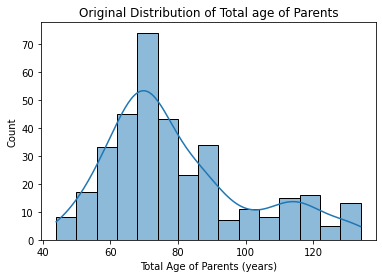

In [30]:
# developing a histogram using HISTPLOT
sns.histplot(data  = low_bw,
              x    = 'parents_total_age',
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Total age of Parents")
plt.xlabel(xlabel = "Total Age of Parents (years)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()


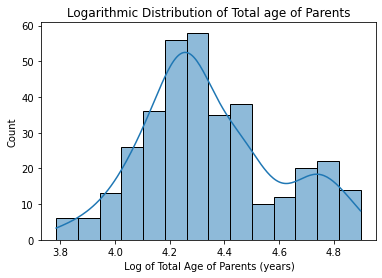

In [31]:
low_bw['log_parents_total_age'] = np.log(low_bw['parents_total_age'])

sns.histplot(data  = low_bw,
              x    = 'log_parents_total_age',
            kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Total age of Parents")
plt.xlabel(xlabel = " Log of Total Age of Parents (years)") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()



In [32]:
# Combining cigs and drink 
low_bw['total_cigsdrink'] = 0

for index, value in low_bw.iterrows():
    
    low_bw.loc[index, 'total_cigsdrink'] = low_bw.loc[index, 'cigs'] + low_bw.loc[index, 'drink']

In [33]:
low_bw[['cigs','drink', 'total_cigsdrink']].head(n = 5)


,cigs,drink,total_cigsdrink
0,13,4,17
1,1,1,2
2,21,4,25
3,12,7,19
4,4,3,7


In [34]:
low_bw[['total_cigsdrink']].value_counts().sort_index()

total_cigsdrink
0                  32
1                   2
2                   6
3                   1
4                   6
5                   6
6                  11
7                   4
8                  14
9                  11
10                  3
11                 12
12                  3
13                 24
14                 16
15                 10
16                 13
17                 24
18                 15
19                 20
20                  7
21                 15
22                  5
23                 13
24                  7
25                  6
26                 11
27                  3
28                  3
29                  9
30                 13
31                  5
32                  2
33                  8
35                  1
36                  9
38                  1
44                  1
dtype: int64

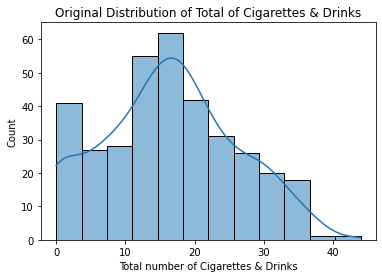

In [35]:
# developing a histogram using HISTPLOT
sns.histplot(data  = low_bw,
              x    = 'total_cigsdrink',
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Total of Cigarettes & Drinks")
plt.xlabel(xlabel = "Total number of Cigarettes & Drinks") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()


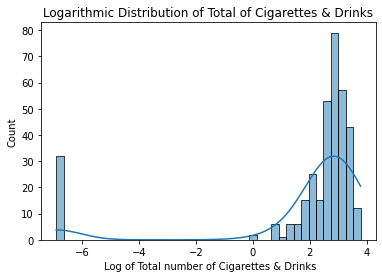

In [36]:
## Creating a log and adding it to the dataset
low_bw['log_total_cigsdrink'] = np.log(low_bw['total_cigsdrink'] + 0.001) ## adding 0.001 to avoid division by zero

sns.histplot(data  = low_bw,
              x    = 'log_total_cigsdrink',
            kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Total of Cigarettes & Drinks")
plt.xlabel(xlabel = " Log of Total number of Cigarettes & Drinks") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()


In [37]:
## Creating a variable for more than 8cigs 

low_bw['morethan_8cigs'] = 0   

# for loop to iterate over every row
# if loop to assign 1 if cigs >= 8
for index, value in low_bw.iterrows():
    
    if low_bw.loc[index, 'cigs'] >= 8:
        low_bw.loc[index, 'morethan_8cigs'] = 1
    else: 
        low_bw.loc[index, 'morethan_8cigs'] = 0


## Creating a variable for more than 5drinks        

low_bw['morethan_5drink'] = 0

# for loop to iterate over every row
# if loop to assign 1 if drink >= 5

for index, value in low_bw.iterrows():
    
    if low_bw.loc[index, 'drink'] >= 5:
        low_bw.loc[index, 'morethan_5drink'] = 1
    else: 
        low_bw.loc[index, 'morethan_5drink'] = 0
        

## Checking if the variables have been created
low_bw[['cigs','morethan_8cigs','drink','morethan_5drink']].head(n = 5)


,cigs,morethan_8cigs,drink,morethan_5drink
0,13,1,4,0
1,1,0,1,0
2,21,1,4,0
3,12,1,7,1
4,4,0,3,0


In [38]:
## Checking value counts to make sure we have atleast 100 observations on either side
low_bw[['morethan_8cigs']].value_counts(normalize = False)


morethan_8cigs
1                 235
0                 117
dtype: int64

In [39]:
## Checking value counts to make sure we have atleast 100 observations on either side
low_bw[['morethan_5drink']].value_counts(normalize = False)

morethan_5drink
1                  202
0                  150
dtype: int64

<br>

<h3> Working with Count / Interval Data  </h3><br>

monpre, npvis<br>

Using box plot to get a better understanding of the data. <br>
However, since we have already removed monpre from our base model, we can skip and proceed to analyze npvis. 

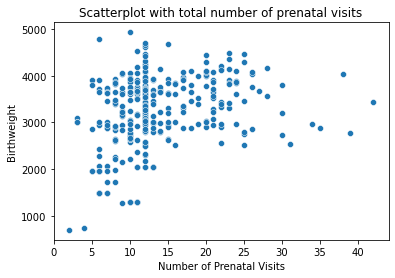

In [40]:
# developing a scatterplot
sns.scatterplot(x    = 'npvis',
                y    = 'bwght',
                data = low_bw)


# titles and axis labels
plt.title(label   = 'Scatterplot with total number of prenatal visits')
plt.xlabel(xlabel = 'Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

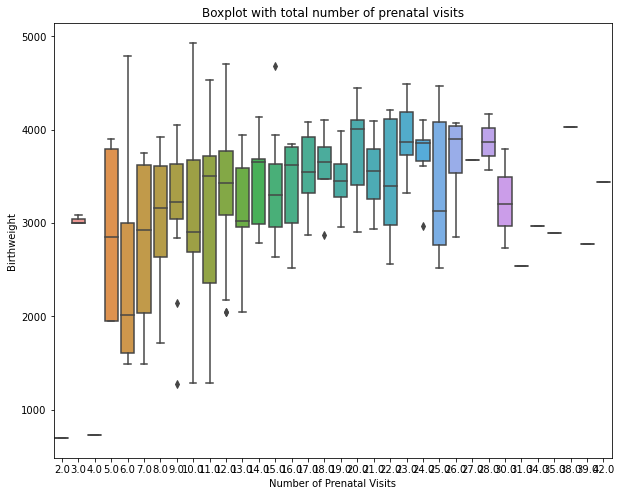

In [41]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a boxplot
sns.boxplot(x    = 'npvis',
            y    = 'bwght',
            data = low_bw)


# titles and axis labels
plt.title(label   = 'Boxplot with total number of prenatal visits')
plt.xlabel(xlabel = 'Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birthweight')

# displaying the plot
plt.show()

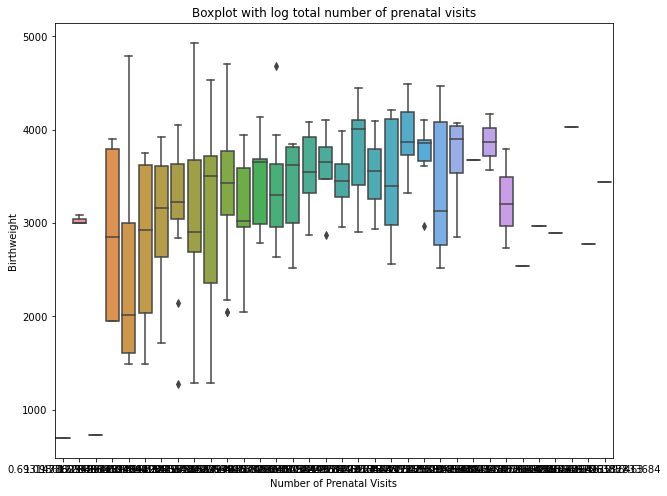

In [42]:
# trying a log transform of npvis to see if we can get a better representation and 
# if the medians can be connected to one another 

low_bw['log_npvis'] = np.log(low_bw['npvis'])

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a boxplot
sns.boxplot(x    = 'log_npvis',
            y    = 'bwght',
            data = low_bw)


# titles and axis labels
plt.title(label   = 'Boxplot with log total number of prenatal visits')
plt.xlabel(xlabel = 'Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birthweight')

# displaying the plot
plt.show()

## Unfortunately, the result is not helpful, as both boxplots look similar. 
## However since it was part of our base model we can retain it to check how well it performs.

<br>

<h3> Working with Categorical Data  </h3><br>

1. male - This cannot be further engineered and since we have removed this from our base model we can skip it. <br>
2. meduc, feduc - Education in number of years. <br>
Creating a variable called min_educ - this defines the minimum education of parents in number of years. 
3. Race (mwhte, fwhte, mblck, fblck, moth, foth) <br>
Creating two variables white_parents and black_parents if both parents are white and black respectively.<br>


In [43]:
## Creating a variable minimum education 
low_bw['min_educ'] = 0

# for loop to iterate over every row
# if loop to assign the min value from both meduc and feduc

for index, value in low_bw.iterrows():
    
    if low_bw.loc[index, 'meduc'] <= low_bw.loc[index, 'feduc']: 
        low_bw.loc[index, 'min_educ'] = low_bw.loc[index, 'meduc']
        
    if low_bw.loc[index, 'feduc'] <= low_bw.loc[index, 'meduc']: 
        low_bw.loc[index, 'min_educ'] = low_bw.loc[index, 'feduc']

## Checking if the variables have been created correctly
low_bw[['meduc','feduc','min_educ']].head(n = 5)

,meduc,feduc,min_educ
0,11.0,12.0,11
1,16.0,12.0,12
2,16.0,16.0,16
3,14.0,12.0,12
4,12.0,12.0,12


In [44]:
## Creating a variable for white parents and black parents (if both parents are white & black respectively)

low_bw['white_parents'] = 0
low_bw['black_parents'] = 0

## for loop to iterate over rows 
## if loop to check if mwhte + fwhte = 2 and mblck + fblck = 2, 
## which would mean both parents are white & black respectively

for index, value in low_bw.iterrows():
    
    if low_bw.loc[index, 'mwhte'] + low_bw.loc[index, 'fwhte'] == 2:
        low_bw.loc[index, 'white_parents'] = 1
        
    if low_bw.loc[index, 'mblck'] + low_bw.loc[index, 'fblck'] == 2:
        low_bw.loc[index, 'black_parents'] = 1 

# Checking race information of the parents 
low_bw[['mwhte','fwhte', 'mblck', 'fblck', 'moth', 'foth','white_parents', 'black_parents']].head(n = 10)

,mwhte,fwhte,mblck,fblck,moth,foth,white_parents,black_parents
0,0,0,0,1,1,0,0,0
1,0,0,1,1,0,0,0,1
2,0,0,0,0,1,1,0,0
3,0,0,1,1,0,0,0,1
4,0,0,1,1,0,0,0,1
5,0,0,0,0,1,1,0,0
6,0,1,1,0,0,0,0,0
7,0,0,1,1,0,0,0,1
8,0,0,1,1,0,0,0,1
9,0,0,1,1,0,0,0,1


In [45]:
## Checking the dataset 
low_bw.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_mage,log_fage,log_cigs,log_drink,m_meduc,m_npvis,m_feduc,parents_total_age,log_parents_total_age,total_cigsdrink,log_total_cigsdrink,morethan_8cigs,morethan_5drink,log_npvis,min_educ,white_parents,black_parents
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600,8.188689,3.135494,3.828641,2.565026,1.386544,0,0,0,69,4.234107,17,2.833272,1,0,2.397895,11,0,0
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912,8.271804,3.135494,3.912023,0.001000,0.001000,0,0,0,73,4.290459,2,0.693647,0,0,2.302585,12,0,1
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090,8.035926,3.178054,3.258097,3.044570,1.386544,0,0,0,50,3.912023,25,3.218916,1,0,2.484907,16,0,0
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370,8.122668,3.218876,3.496508,2.484990,1.946053,0,0,0,58,4.060443,19,2.944492,1,1,2.484907,12,0,1
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827,8.249836,3.218876,3.465736,1.386544,1.098946,0,0,0,57,4.043051,7,1.946053,0,0,2.079442,12,0,1


#### Analyzing Pearson correlations with the Y-variable, bwght

In [46]:
# creating a (Pearson) correlation matrix
df_corr = low_bw.corr().round(2)


# printing (Pearson) correlations with bwght
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght                    1.00
log_bwght                0.97
fmaps                    0.46
omaps                    0.45
log_npvis                0.36
npvis                    0.30
feduc                    0.23
meduc                    0.21
min_educ                 0.20
moth                     0.10
m_npvis                  0.05
foth                     0.05
mblck                    0.04
fblck                    0.03
black_parents            0.02
male                     0.02
monpre                   0.02
m_feduc                  0.01
m_meduc                 -0.07
fwhte                   -0.07
mwhte                   -0.14
white_parents           -0.14
log_total_cigsdrink     -0.17
log_cigs                -0.22
log_drink               -0.30
morethan_8cigs          -0.35
log_mage                -0.46
mage                    -0.48
morethan_5drink         -0.49
log_fage                -0.52
log_parents_total_age   -0.54
cigs                    -0.57
parents_total_age       -0.58
fage      

<br>

## Part V - Developing a FIT model after feature engineering <br>
Step 1 : <br>
Using all variables and creating a full model on our base model to check how each explanatory variable performs.  <br>
Step 2 : <br>
Drop variables that are not significant to make sure that all p-values in the model are < 0.05. <br>
Step 3 : <br>
Modifying the model after step 2

In [47]:
# making a copy of low_bw
low_bw_explanatory = low_bw.copy()


# dropping bwght and log_bwght from the explanatory variable set
low_bw_explanatory = low_bw_explanatory.drop(['bwght','log_bwght', 
                                             'omaps','fmaps',
                                             'm_meduc','m_feduc','m_npvis'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in low_bw_explanatory:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_mage +
log_fage +
log_cigs +
log_drink +
parents_total_age +
log_parents_total_age +
total_cigsdrink +
log_total_cigsdrink +
morethan_8cigs +
morethan_5drink +
log_npvis +
min_educ +
white_parents +
black_parents +


In [48]:
# INSTANTIATING a model type with log_bwght as it gives a better R- squared
lm_full = smf.ols(formula = """ log_bwght ~ mage +
                                    meduc +
                                    monpre +
                                    npvis +
                                    fage +
                                    feduc +
                                    cigs +
                                    drink +
                                    male +
                                    mwhte +
                                    mblck +
                                    moth +
                                    fwhte +
                                    fblck +
                                    foth +
                                    log_mage +
                                    log_fage +
                                    log_cigs +
                                    log_drink +
                                    parents_total_age +
                                    log_parents_total_age +
                                    total_cigsdrink +
                                    log_total_cigsdrink +
                                    morethan_8cigs +
                                    morethan_5drink +
                                    log_npvis +
                                    min_educ +
                                    white_parents +
                                    black_parents""", data = low_bw)


# telling Python to FIT the data to the blueprint
results = lm_full.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     61.62
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          4.26e-106
Time:                        19:36:48   Log-Likelihood:                 240.26
No. Observations:                 352   AIC:                            -430.5
Df Residuals:                     327   BIC:                            -333.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.28

Creating the fit model

In [49]:
# INSTANTIATING a fit model by modifying the above full model.
# variables removed: monpre, npvis, male,log_mage (we already have mage), 
## log_cigs, log_drink, parents_total_age (using log instead), total_cigsdrink (using log instead), 
## black parents

lm_fit = smf.ols(formula = """ log_bwght ~ mage +
                                    meduc +
                                    fage +
                                    feduc +
                                    cigs +
                                    drink +
                                    mwhte +
                                    mblck +
                                    moth +
                                    fwhte +
                                    fblck +
                                    foth +
                                    log_parents_total_age +
                                    log_total_cigsdrink +
                                    morethan_8cigs +
                                    morethan_5drink +
                                    log_npvis +
                                    min_educ +
                                    white_parents""", data = low_bw)


# telling Python to FIT the data to the blueprint
results = lm_fit.fit()


# printing a summary of the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     89.24
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          3.22e-110
Time:                        19:36:48   Log-Likelihood:                 231.75
No. Observations:                 352   AIC:                            -429.5
Df Residuals:                     335   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.9522      0.439      4.451      0.000       1.089       2.815
mage                     -0.0177      0.003     -6.522      0.000      -0.023      -0.012
meduc                     0.0155      0.006      2.514      0.012       0.003       0.028
fage                     -0.0238      0.003     -8.476      0.000      -0.029      -0.018
feduc                     0.0227      0.006      4.031      0.000       0.012       0.034
cigs                     -0.0264      0.002    -12.580      0.000      -0.031      -0.022
drink                    -0.0263      0.004     -7.422      0.000      -0.033      -0.019
mwhte                     0.4042      0.088      4.588      0.000       0.231       0.577
mblck                     0.7619      0.176      4.326      0.000       0.415       1.108
moth                      0.7861      0.178      4.424      0.000       0.437       1.136
fwhte                     0.6235      0.147      4.231      0.000       0.334       0.913
fblck                     0.6694      0.148      4.508      0.000       0.377       0.961
foth                      0.6593      0.148      4.461      0.000       0.369       0.950
log_parents_total_age     1.4443      0.222      6.501      0.000       1.007       1.881
log_total_cigsdrink       0.0390      0.004     10.085      0.000       0.031       0.047
morethan_8cigs            0.1203      0.027      4.418      0.000       0.067       0.174
morethan_5drink          -0.0478      0.024     -2.029      0.043      -0.094      -0.001
log_npvis                 0.0644      0.017      3.687      0.000       0.030       0.099
min_educ                 -0.0258      0.008     -3.227      0.001      -0.041      -0.010
white_parents             0.4042      0.088      4.588      0.000       0.231       0.577
==============================================================================
Omnibus:                       41.996   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.786
Skew:                           0.104   Prob(JB):                     3.53e-60
Kurtosis:                       7.316   Cond. No.                     6.07e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.88e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Part VI - Creating Testing & Training Sets <br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [50]:
# preparing explanatory variable data
bw_data   = low_bw.drop(['bwght','log_bwght', 
                        'omaps','fmaps',
                        'm_meduc','m_feduc','m_npvis'],
                               axis = 1)


# preparing response variable data -- creating two versions one of them with log
bw_target = low_bw.loc[ : , 'bwght']

log_bw_target = low_bw.loc[ : , 'log_bwght']  ## using this as it gives better results


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(bw_data,
                                    log_bw_target,
                                    test_size = 0.25,
                                    random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (264, 29)
y-side: 264


Testing Data
------------
X-side: (88, 29)
y-side: 88



## OLS Regression

In [51]:
# declaring set of x-variables from the model obtained after feature engineering

x_variables = ['mage', 'meduc', 'fage', 'feduc', 'cigs', 'drink', 'mwhte', 'mblck',
                'moth', 'fwhte', 'fblck', 'foth', 'log_parents_total_age', 'log_total_cigsdrink',
                'morethan_8cigs', 'morethan_5drink', 'log_npvis', 'min_educ', 'white_parents']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} + ")

mage + 
meduc + 
fage + 
feduc + 
cigs + 
drink + 
mwhte + 
mblck + 
moth + 
fwhte + 
fblck + 
foth + 
log_parents_total_age + 
log_total_cigsdrink + 
morethan_8cigs + 
morethan_5drink + 
log_npvis + 
min_educ + 
white_parents + 


In [52]:
# merging X_train and y_train so that they can be used in statsmodels
bw_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_bwght ~ mage + 
                                meduc + 
                                fage + 
                                feduc + 
                                cigs + 
                                drink + 
                                mwhte + 
                                mblck + 
                                moth + 
                                fwhte + 
                                fblck + 
                                foth + 
                                log_parents_total_age + 
                                log_total_cigsdrink + 
                                morethan_8cigs + 
                                morethan_5drink + 
                                log_npvis + 
                                min_educ + 
                                white_parents""",
                                data = bw_train)


# Step 2: fit the model based on the data
results = lm_best.fit()


# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     67.59
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.52e-80
Time:                        19:36:48   Log-Likelihood:                 179.58
No. Observations:                 264   AIC:                            -325.2
Df Residuals:                     247   BIC:                            -264.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.04

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Part VII - Applying the model in SciKit Learn <br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [53]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = low_bw.loc[ : , x_variables]


# Preparing the target variable
log_bw_target = low_bw.loc[ : , 'log_bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            bw_data,     # x-variables
            log_bw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_bw_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


### Developing a Linear Regression

In [54]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.8141
OLS Testing Score  : 0.7544
OLS Train-Test Gap : 0.0597


In [55]:
# zipping each feature name to its coefficient
lr_model_values = zip(bw_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.8)
('mage', -0.02)
('meduc', 0.01)
('fage', -0.03)
('feduc', 0.02)
('cigs', -0.02)
('drink', -0.02)
('mwhte', 0.01)
('mblck', -0.03)
('moth', 0.01)
('fwhte', -0.03)
('fblck', 0.03)
('foth', -0.0)
('log_parents_total_age', 1.95)
('log_total_cigsdrink', 0.04)
('morethan_8cigs', 0.08)
('morethan_5drink', -0.08)
('log_npvis', 0.06)
('min_educ', -0.03)
('white_parents', 0.01)


### Developing a Lasso Regression

In [56]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso() 


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.4027
Lasso Testing Score  : 0.4129
Lasso Train-Test Gap : 0.0102


In [57]:
# zipping each feature name to its coefficient
lasso_model_values = zip(bw_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 8.52)
('mage', -0.0)
('meduc', 0.0)
('monpre', 0.0)
('npvis', 0.0)
('fage', -0.0)
('feduc', 0.0)
('cigs', -0.0)
('drink', -0.0)
('male', 0.0)
('mwhte', -0.0)
('mblck', 0.0)
('moth', 0.0)
('fwhte', -0.0)
('fblck', 0.0)
('foth', 0.0)
('log_mage', -0.0)
('log_fage', -0.0)
('log_cigs', -0.0)
('log_drink', -0.0)
('parents_total_age', -0.01)
('log_parents_total_age', -0.0)
('total_cigsdrink', -0.0)
('log_total_cigsdrink', 0.0)
('morethan_8cigs', -0.0)
('morethan_5drink', -0.0)
('log_npvis', 0.0)
('min_educ', 0.0)
('white_parents', -0.0)
('black_parents', 0.0)


In [58]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 8.52)
('meduc', 0.0)
('npvis', 0.0)
('feduc', 0.0)
('drink', -0.0)
('mwhte', -0.0)
('moth', 0.0)
('fblck', 0.0)
('log_mage', -0.0)
('log_cigs', -0.0)
('parents_total_age', -0.01)
('total_cigsdrink', -0.0)
('morethan_8cigs', -0.0)
('log_npvis', 0.0)
('white_parents', -0.0)


### Developing an ARD Model

In [59]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.8078
Testing Score : 0.7552
ARD Train-Test Gap : 0.0526


In [60]:
# zipping each feature name to its coefficient
ard_model_values = zip(bw_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3.02)
('mage', 0.0)
('meduc', 0.0)
('monpre', 0.0)
('npvis', 0.0)
('fage', -0.02395)
('feduc', 0.0)
('cigs', 0.0)
('drink', 0.0)
('male', 0.0)
('mwhte', 0.0)
('mblck', 0.0)
('moth', 0.0)
('fwhte', 0.0)
('fblck', 0.0)
('foth', 0.0)
('log_mage', 0.0)
('log_fage', 0.7991)
('log_cigs', 0.0)
('log_drink', 0.0)
('parents_total_age', -0.0135)
('log_parents_total_age', 0.98418)
('total_cigsdrink', -0.02324)
('log_total_cigsdrink', 0.03808)
('morethan_8cigs', 0.07616)
('morethan_5drink', -0.05417)
('log_npvis', 0.0638)
('min_educ', 0.0)
('white_parents', 0.0)
('black_parents', 0.0)


In [61]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3.02)
('meduc', 0.0)
('npvis', 0.0)
('fage', -0.02395)
('cigs', 0.0)
('male', 0.0)
('mblck', 0.0)
('fwhte', 0.0)
('foth', 0.0)
('log_fage', 0.7991)
('log_drink', 0.0)
('parents_total_age', -0.0135)
('log_parents_total_age', 0.98418)
('total_cigsdrink', -0.02324)
('log_total_cigsdrink', 0.03808)
('morethan_8cigs', 0.07616)
('morethan_5drink', -0.05417)
('log_npvis', 0.0638)
('white_parents', 0.0)


# Comparing the Models

In [62]:
# comparing results

print(f"""
Model      Train Score          Test Score          Gap
-----      -----------          ----------          -----
OLS        {lr_train_score}                {lr_test_score}             {(lr_train_score-lr_test_score).round(decimals = 4)}
Lasso      {lasso_train_score}                {lasso_test_score}            {(lasso_train_score-lasso_test_score).round(decimals = 4)}
ARD        {ard_train_score}                {ard_test_score}             {(ard_train_score-ard_test_score).round(decimals = 4)}

Final Chosen model :: ARD 
""")



Model      Train Score          Test Score          Gap
-----      -----------          ----------          -----
OLS        0.8141                0.7544             0.0597
Lasso      0.4027                0.4129            -0.0102
ARD        0.8078                0.7552             0.0526

Final Chosen model :: ARD 

